In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [18]:
start_date = pd.to_datetime('2013-01-28')
end_date = pd.to_datetime('2013-03-22')
tenor = '10Y'
# Shading the study period
study_start = pd.to_datetime('2013-02-25')
study_end = pd.to_datetime('2013-03-22')
phase_start = pd.to_datetime('2013-03-11')
date_nice = f'Feb - Mar 2013' 

In [19]:

# Filter the data for February and March for both datasets
df_usd = pd.read_excel('data/liquidity/Amihud/USD_CAD.xlsx')
df_usd = df_usd[(df_usd['Curr'] == 'USD') & (df_usd['Tenor'] == tenor)]
df_cad = pd.read_excel('data/liquidity/Amihud/USD_CAD.xlsx')
df_cad = df_cad[(df_cad['Curr'] == 'CAD') & (df_cad['Tenor'] == tenor)]
df_usd_filtered = df_usd[(df_usd['Trade Date'] >= start_date) & (df_usd['Trade Date'] <= end_date)].sort_values(by='Trade Date')
df_cad_filtered = df_cad[(df_cad['Trade Date'] >= start_date) & (df_cad['Trade Date'] <= end_date)].sort_values(by='Trade Date')


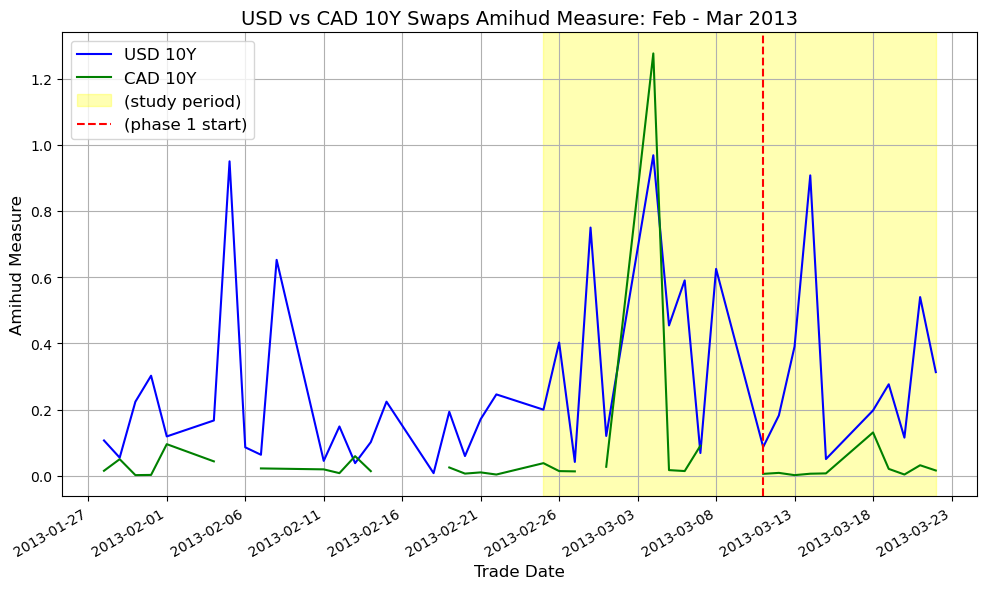

In [20]:
# Re-plotting with additional formatting for study period and phase 1 start

plt.figure(figsize=(10, 6))
plt.plot(df_usd_filtered['Trade Date'], df_usd_filtered['Amihud'], label=f'USD {tenor}', color='blue')
plt.plot(df_cad_filtered['Trade Date'], df_cad_filtered['Amihud'], label=f'CAD {tenor}', color='green')

plt.axvspan(study_start, study_end, color='yellow', alpha=0.3, label='(study period)')

# Adding a vertical dashed line for phase 1 start
plt.axvline(phase_start, color='red', linestyle='--', label='(phase 1 start)')

# Formatting the plot
plt.title(f'USD vs CAD {tenor} Swaps Amihud Measure: {date_nice}', fontsize=14)
plt.xlabel('Trade Date', fontsize=12)
plt.ylabel('Amihud Measure', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate() # Rotation

plt.tight_layout()
plt.show()
